<a href="https://colab.research.google.com/github/Le4o/topicos-avancados-ic/blob/main/C%C3%B3pia_de_GAN_VAE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabalho GAN + VAE/AE
#### Exercício da matéria de Tópicos Avançados em Inteligência Computacional

Grupo:
- João Victor de Sledz Bulhões
- Leonardo de Andrade Santana
- Lis da Silva Azevedo

### Definição do Exercício

O trabalho consiste em criar uma GAN para criar dados artificiais para o dataset Medical MNIST (https://www.kaggle.com/andrewmvd/medical-mnist) de shape reduzido (32x32) e posteriormente utilizar uma rede VAE ou AE para aumentar a dimensionalidade da imagem para 64x64.
Serão consideradas as 2 redes como parte do trabalho e a redução do shape inicial deve ser feito via código.

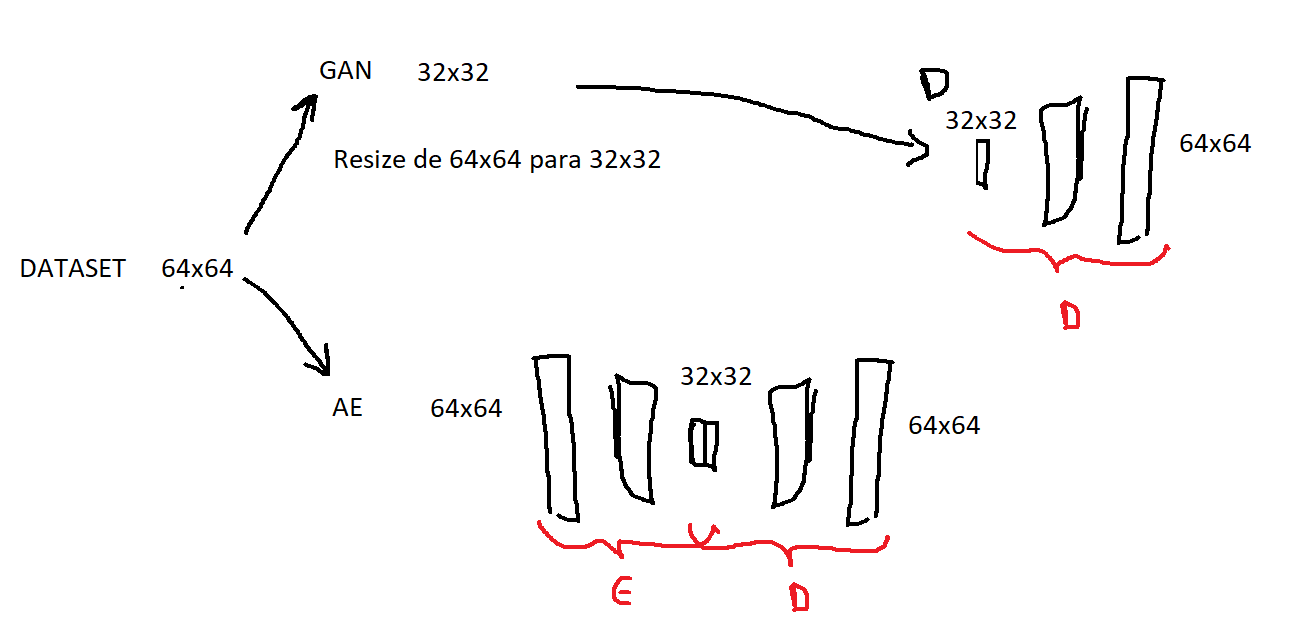

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
from PIL import Image

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [13]:
from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/My Drive/Datasets/

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/My Drive/Datasets


In [3]:
def count_of_images(dir_path):
    path, dirs, files = next(os.walk(dir_path))
    return len(files)

In [20]:
abdomenCT_count = count_of_images("medical_mnist/AbdomenCT/")
breastMRI_count = count_of_images("medical_mnist/BreastMRI/")
chestCT_count = count_of_images("medical_mnist/ChestCT/")

In [21]:
classes = ["AbdomenCT", "BreastMRI", "ChestCT"]
number_of_classes = [abdomenCT_count, breastMRI_count, chestCT_count]

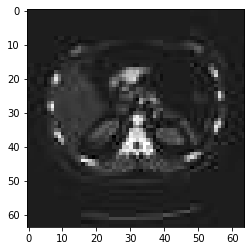

In [19]:
abdomen_img = np.asarray(Image.open("medical_mnist/AbdomenCT/000000.jpeg"))
plt.imshow(abdomen_img, cmap="gray")